# Task 2
Task 2: Text Summarization
Objective: Create a system that summarizes lengthy articles, blogs, or news into concise
summaries.
● Dataset: CNN/Daily Mail Dataset
● Steps:
1. Preprocess textual data for summarization.
2. Implement extractive summarization using libraries like spaCy.
3. Implement abstractive summarization using pre-trained models like BERT or
GPT with HuggingFace's transformers.
4. Fine-tune models to improve the quality of summaries.
5. Test the model on real-world articles and evaluate summary coherence.
● Outcome: A summarization model capable of generating
concise summaries from long texts.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from transformers import pipeline
import warnings
warnings.filterwarnings("ignore")

# 📁 Load Dataset and Inspect

In [11]:
file_path = "C:/Users/PMLS/Desktop/All desktop things/DS internship/TASK 2/cnn mail dataset.csv"
df = pd.read_csv(file_path)
df.dropna(subset=['body'], inplace=True)

In [12]:
# Add length column
df['text_length'] = df['body'].apply(len)

# Print dataset overview
print("✅ Dataset Shape:", df.shape)
print("📋 Columns:", df.columns.tolist())
print("🔍 Missing Values:\n", df.isnull().sum())
print("🧾 Article Length Stats:\n", df['text_length'].describe())


✅ Dataset Shape: (1676, 4)
📋 Columns: ['url', 'category', 'body', 'text_length']
🔍 Missing Values:
 url            0
category       0
body           0
text_length    0
dtype: int64
🧾 Article Length Stats:
 count     1676.000000
mean      5416.541169
std       4825.766924
min         86.000000
25%       2599.500000
50%       4175.000000
75%       6671.750000
max      60590.000000
Name: text_length, dtype: float64


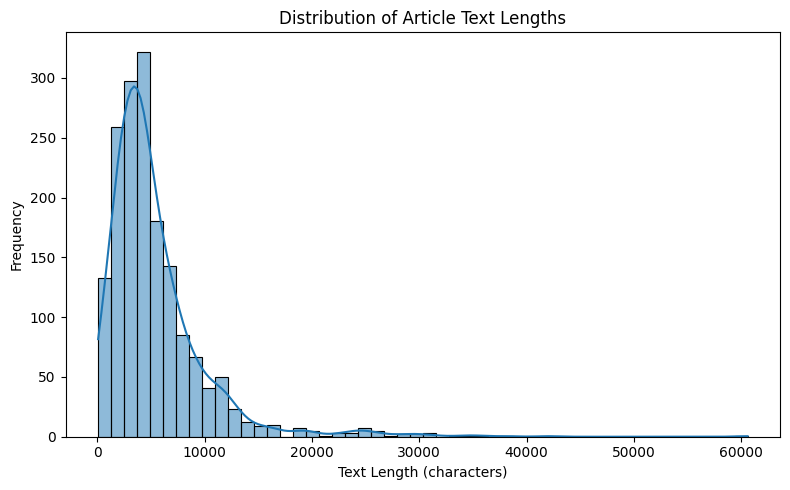

In [13]:
# Plot article length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Article Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [14]:
print("\n🔹 Extractive Summarization")
nlp = spacy.load("en_core_web_sm")
def extractive_summary(text, n_sentences=3):
    doc = nlp(text)
    # Select the longest N sentences (naive method)
    sorted_sents = sorted(doc.sents, key=lambda s: len(s.text), reverse=True)
    return " ".join([sent.text.strip() for sent in sorted_sents[:n_sentences]])

# Test extractive summary
sample_text = df['body'].iloc[0]
print("\n🧾 Original Text (First 400 chars):\n", sample_text[:400])
print("\n📌 Extractive Summary:\n", extractive_summary(sample_text))


🔹 Extractive Summarization

🧾 Original Text (First 400 chars):
 easyjet and cruise firm carnival are to lose their place on the prestigious ftse 100 after the coronavirus impact hit their share prices.  the airline lost up to two-thirds of its value this year, and despite a recent recovery it remains well below the threshold to stay on the index.  a full list of ftse movers will not be known until wednesday, but british gas-owner centrica is also out.  compani

📌 Extractive Summary:
 companies known to be promoted from the ftse 250 include gambling firm gvc.  as well as enhancing a company's reputation, being on the ftse 100 is significant because some investment funds only buy shares in the uk top companies. however, helal miah, investment analyst at the share centre, said: "we fear [kingfisher] will be another yo-yo stock as the retail sector still grapples with its pre-existing challenges as well as the impact of covid-19." "unlike some other operators gvc has multiple strings to i

# 🤖 Abstractive Summarization with BART